In [124]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import importlib
import iris_segmentation_utils
importlib.reload(iris_segmentation_utils)
from iris_segmentation_utils import *

In [18]:
def load_image(image_path):
    try:
        img = Image.open(f"{image_path}")
        return img
    except Exception as e:
        print(f"Error loading image {image_path}: {e}")
        return None

In [23]:
data=pd.read_csv('data/image_data.csv')
data['image'] = data['image_path'].apply(lambda x: load_image(f'data/{x}'))
data.head()

,person,eye,image_path,image
0,1,left,images/person1_left_image.bmp,<PIL.BmpImagePlugin.BmpImageFile image mode=L ...
1,1,left,images/person1_left_image.bmp,<PIL.BmpImagePlugin.BmpImageFile image mode=L ...
2,1,left,images/person1_left_image.bmp,<PIL.BmpImagePlugin.BmpImageFile image mode=L ...
3,1,left,images/person1_left_image.bmp,<PIL.BmpImagePlugin.BmpImageFile image mode=L ...
4,1,left,images/person1_left_image.bmp,<PIL.BmpImagePlugin.BmpImageFile image mode=L ...


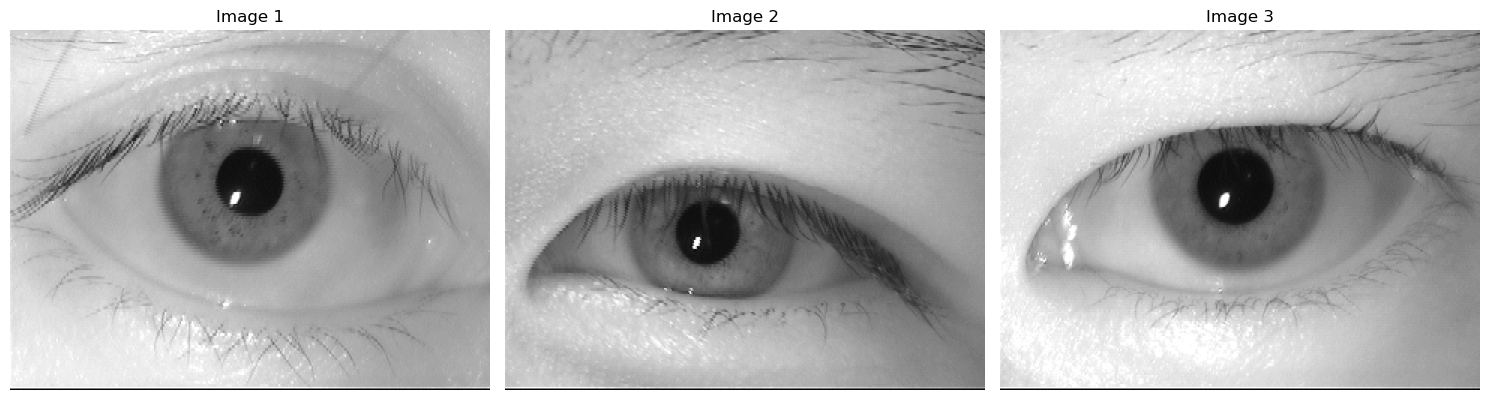

In [32]:
sample_images = data['image'].sample(3)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

#displaying sample images
for i, ax in enumerate(axes):
    ax.imshow(sample_images.iloc[i], cmap='gray')
    ax.axis('off') 
    ax.set_title(f'Image {i+1}')

plt.tight_layout()
plt.show()

#### Converting all images to grayscale

In [45]:
data['image'] = data['image'].apply(lambda x: convert_to_grayscale(x))

#### Binarization of iris experiments

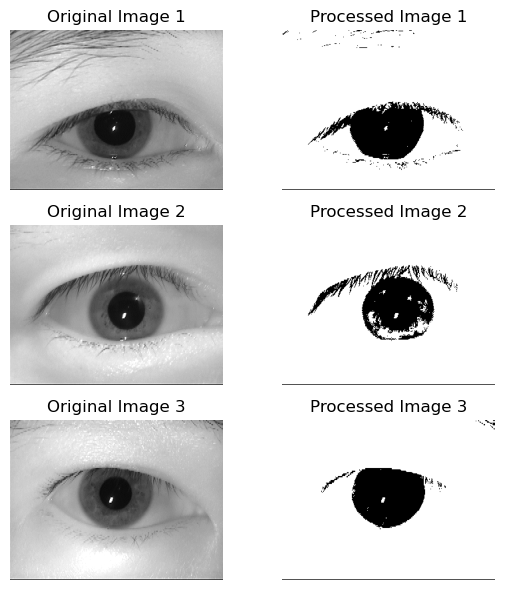

In [132]:
X_I=1.8
sample_images = data['image'].sample(3)
processed_images = sample_images.apply(lambda x: iris_binarization(x, X_I))
plot_images_experiments(sample_images, processed_images, n=3)

#### Binarization of pupil experiments

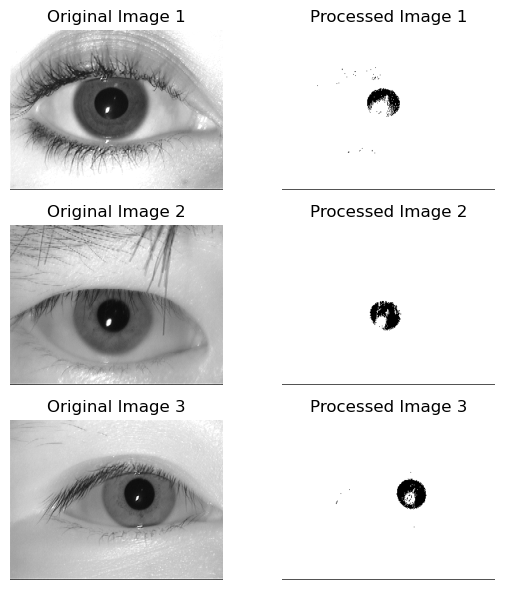

In [129]:
X_P=11
sample_images = data['image'].sample(3)
processed_images = sample_images.apply(lambda x: pupil_binarization(x, X_I))
plot_images_experiments(sample_images, processed_images, n=3)